<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/T3SE/blob/main/models/lightgbm/T3SE_Nterm_1st_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import lightgbm as lgb # gradient-boosting tree classification

## Data preparation

In [2]:
df = pd.read_csv('/content/T3SE_clustered_embeddings_Nterm_train.csv')

df

,ID,Label,Sequence_part,f0,f1,f2,f3,f4,f5,f6,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,WP_047339834.1,0,MKGYQLTFFTSQGARHGHAALCDWV,0.000210,-0.000371,-0.000332,0.000677,0.000320,-0.000946,-0.000526,...,-0.000703,-0.000633,0.000156,-0.000292,0.000568,-0.000552,0.000635,-0.001400,-0.001467,0.000492
1,WP_147480133.1,0,RLAALKRWTDHIYTHFSARVPGPDE,-0.000352,0.000539,0.000015,0.000209,-0.000534,-0.001777,0.001345,...,0.001128,0.001301,-0.000383,0.000473,-0.001378,-0.001040,0.000519,0.000343,0.001538,0.000109
2,WP_005744181.1,0,MSKDRVAIIGAGPAGIRAAQTLLEH,0.000853,0.000403,0.000838,0.001156,-0.000170,0.000246,-0.001304,...,0.000492,-0.000609,0.000100,-0.000295,0.002079,-0.000435,0.000335,0.000268,-0.000414,0.000566
3,WP_139473748.1,0,MLRTERPGDMLPVYELLSAAFGRSD,0.001291,-0.000491,0.000439,-0.000396,-0.000467,-0.001051,-0.000467,...,-0.000108,0.001273,-0.001285,-0.000374,-0.002086,-0.001811,0.000516,-0.000444,0.000112,0.000442
4,WP_234896833.1,0,MPTGARVLDLGCGTGVPTARQLVAS,0.001062,0.000568,-0.000916,0.000299,-0.001071,-0.001102,-0.000944,...,0.000009,0.000162,0.000140,-0.000715,0.000543,-0.000792,0.000941,-0.001510,-0.000483,-0.000697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,WP_040148532.1,0,SRVFAGGLRNPVGTAWEPQSKSLWV,0.000077,-0.000477,0.000034,-0.001071,-0.000901,-0.002189,-0.000246,...,0.000149,-0.000754,0.000527,-0.000313,0.000695,-0.000253,0.000130,0.000465,-0.000738,0.000257
3009,WP_043882701.1,0,WGQMSYWGAQVIISLFGAIPVIGDD,0.000067,-0.000459,-0.000251,0.001086,0.000694,-0.000604,-0.001072,...,0.000409,0.000040,-0.000532,0.001273,0.001651,-0.001062,0.001227,-0.000154,-0.000082,0.000823
3010,WP_028133307.1,0,MTVYAIAQLKMTDRAAYDRYQARFF,-0.000660,-0.000620,-0.000421,0.001050,0.000951,-0.001206,-0.000824,...,-0.000577,-0.000389,-0.000893,0.000142,0.000848,0.000501,0.000568,-0.000728,-0.000189,0.000303
3011,WP_244625383.1,0,MYTDHHGWLQGWLRRKLGDGCVAAD,0.000603,0.000270,-0.000858,0.000325,-0.000792,-0.000670,-0.000831,...,0.001298,0.000591,0.000417,0.000943,-0.000528,-0.000562,0.000797,-0.001371,-0.000428,-0.000071


In [3]:
df.drop(columns=['ID', 'Sequence_part'], inplace=True)
df['Label'].value_counts()

0    2784
1     229
Name: Label, dtype: int64

In [4]:
X_train = df.iloc[:,1:]
y_train = df['Label']

## Model training

In [5]:
clf = lgb.LGBMClassifier(objective="binary", seed=123)
clf.fit(X_train, y_train)

LGBMClassifier(objective='binary', seed=123)

## Model evaluation

In [6]:
df2 = pd.read_csv('/content/T3SE_clustered_embeddings_Nterm_test.csv').drop(columns=['ID', 'Sequence_part'])
df2

,Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,0,0.000516,-0.000213,0.000387,0.000168,0.000663,-0.000399,0.000294,-0.001079,0.000547,...,-0.001197,-0.001347,-0.000111,-0.000930,0.000113,-0.001245,0.000305,0.000046,-0.000894,0.000971
1,0,0.000648,0.000037,-0.000134,0.000115,-0.000636,-0.000491,-0.000068,-0.000220,0.000160,...,0.000140,0.000255,-0.000088,-0.000447,0.001752,-0.000974,0.000849,-0.000916,-0.000444,0.000394
2,1,0.000629,-0.000877,0.000461,0.000714,0.001139,0.000233,0.001062,-0.001422,0.000310,...,-0.000564,-0.000599,-0.000023,0.000335,0.001965,-0.001921,-0.000297,0.000457,-0.000930,0.000816
3,0,0.001227,-0.000333,0.000010,0.000220,0.000367,-0.001143,-0.000574,-0.000581,0.000523,...,0.000596,-0.001420,0.000388,-0.000671,0.002397,-0.000605,-0.000437,-0.000180,-0.000794,0.000910
4,0,0.001206,-0.000540,0.000094,-0.000074,-0.000573,-0.000588,0.000063,-0.001691,-0.000637,...,0.000684,0.000716,-0.000813,-0.000241,-0.000356,-0.000974,0.000375,-0.000346,0.000237,0.000754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0,0.000770,-0.000807,0.000411,-0.000480,-0.001368,-0.000954,0.000359,0.000682,0.001080,...,0.000165,-0.001045,-0.000674,0.000294,0.001213,-0.000464,-0.000252,-0.001550,-0.000871,0.000582
750,0,-0.000221,-0.000206,0.000836,0.000278,-0.000241,-0.001993,-0.000077,-0.000357,-0.000114,...,0.001342,0.000390,0.000950,0.001170,0.000483,0.000238,0.000048,0.000389,-0.000647,0.000556
751,0,0.000873,0.000361,-0.000166,0.001087,-0.001475,0.000241,-0.000649,-0.000452,-0.000745,...,-0.000265,-0.000500,0.000280,-0.000513,0.001085,-0.000273,-0.000263,-0.000977,-0.000485,0.000895
752,0,0.000311,-0.000486,0.000593,-0.000314,0.000150,-0.000889,0.000057,-0.000160,-0.000269,...,0.000462,-0.001463,-0.000958,0.000003,0.001287,-0.001187,-0.000359,-0.001201,-0.000520,0.000703


In [7]:
X_test = df2.iloc[:,1:]
y_test = df2['Label']

y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score

# Calculate test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

Test Accuracy: 0.9363395225464191
F1 Score: 0.5636363636363636
AUC: 0.9001276386843396


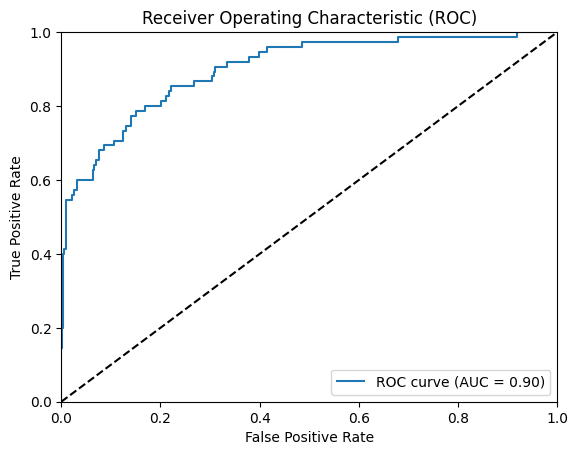

In [9]:
# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

AUPRC Score: 0.6773029588198158


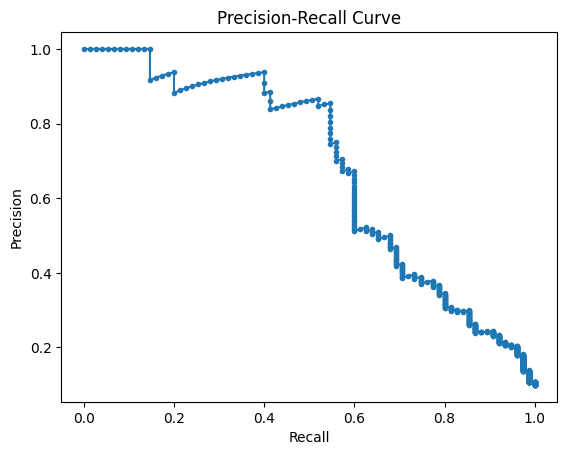

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate AUPRC score
auprc_score = average_precision_score(y_test, y_pred_proba)
print("AUPRC Score:", auprc_score)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

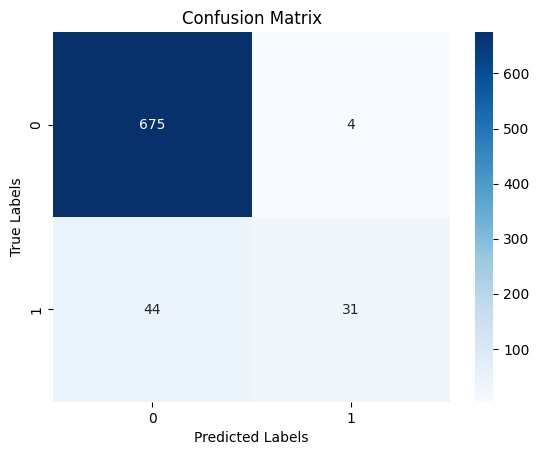

In [10]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()